### __Python Data Visualization Graphs__

.plot(kind= ' ') is part of Pandas plotting which uses Matplotlib

'line'	Default. Line plot.

'bar'	Vertical bar chart

'barh'	Horizontal bar chart

'hist'	Histogram (frequency distribution)

'box'	Boxplot (summary of quartiles)

'kde' or 'density'	Kernel Density Estimate (smooth curve)

'area'	Area plot (stacked by default)

'pie'	Pie chart (works only with Series)

'scatter'	Scatter plot (requires x= and y=)

'hexbin'	Hexagonal binning plot (for dense 2D data), like millions of points. It creates a honeycomb-looking heatmap of point density.

df.plot(kind='hexbin', x='a', y='b', gridsize=20)

#### _Scatter Plots_

An important part of exploratory data analysis is developing an understanding of the relationships between variables (i.e., columns) in our data.

You might need, for example, to better understand the relationship between height and weight, between temperature and ice cream sales, the relationship between educational level and salary, or the relationship between study hours and test scores. Scatter plots are an excellent way to visualize these relationships.

A scatter plot is simply a graph where a single point is plotted for each set of variables, but the points are not connected by lines.

To further illustrate the usefulness of scatter plots, let's examine a data set of heights and weights for 10,000 adults in the U.S. We'll start, as usual, by reading the data, displaying the first few rows, and visualizing general information about the data set.

In [2]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

print(df.head())
print()
df.info()

      height      weight  age  male
0  67.345391  151.163975   26     0
1  69.131220  203.525148   44     1
2  67.710271  205.752354   42     1
3  62.412362  117.148813   27     0
4  72.967492  229.394555   49     1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   weight  10000 non-null  float64
 2   age     10000 non-null  int64  
 3   male    10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


The data has four columns and 10,000 rows, with no missing values. Each row contains data collected for a single individual. The columns are:

'height': The person's height, in inches.

'weight': The person's weight, in pounds.

'age': The person's age, in years.

'male': The person's sex, where 1 = male and 0 = female.

Let's look at a numerical description of the data:

In [4]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

print(df.describe())

             height        weight           age          male
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      66.367560    164.157357     37.507000      0.500000
std        4.284200     33.881810      7.495236      0.500025
min       53.663133     63.700127     25.000000      0.000000
25%       63.029487    137.599803     31.000000      0.000000
50%       66.276290    163.565827     37.000000      0.500000
75%       69.676237    191.227505     44.000000      1.000000
max       79.598742    280.989699     50.000000      1.000000


How to understand std?
Think of it like this:

- A small std means that your values are close to the mean → low variability.
- A large std means your values are spread out → high variability.

How to interpret 25,50,75%?
Think of your data sorted from smallest to largest.

25% → One quarter of your data is below this value.

50% → Half the data is below this value → this is the median.

75% → Three quarters of your data is below this value.

It’s like slicing your data into four equal parts.

From the result of describe(), we can determine that the age range of adults in the dataset is 25 to 50 years. The _"male" column_ is included in the output because it is a Python numeric data type, but we must __remember that it is a categorical variable__, so we shouldn't overemphasize this information.

Now that we have some summary statistics, let's use visualization to better understand the data. First, let's investigate the relationship between height and weight.

We'll start by using the default behavior of the plot() method to create a line chart, plotting height and weight on the X and Y axes, respectivel

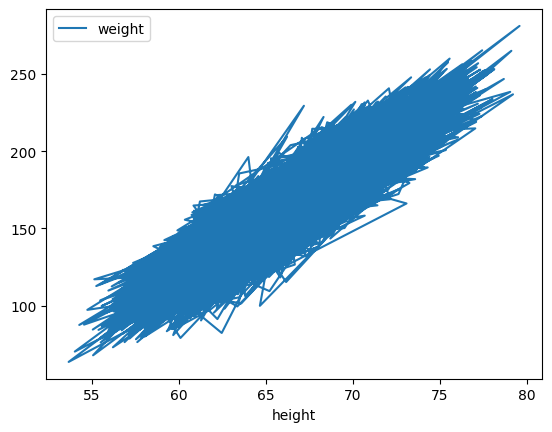

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight')
plt.show()

Oops! What a mess! Why does our graph look like this?

By default, the plot() method creates a line graph by going through each row of the DataFrame in order. For each row, a point is plotted, and this point is connected to the previous one using a line.

Since our DataFrame isn't sorted by any particular column, the points are all over the place and the lines connecting them don't make sense, causing this clutter in the graph.

Let's sort our data by height and plot it again to see if we can improve the graph:

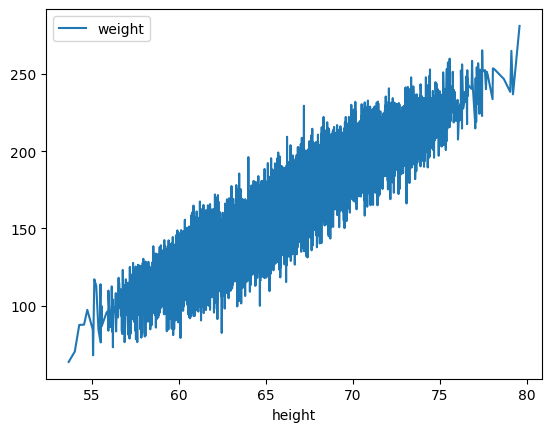

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.sort_values('height').plot(x='height', y='weight')
plt.show()

That's progress, but connecting data points with lines is pointless, since one person's height and weight are unrelated to another's height and weight. Each data point represents a discrete, independent measurement.

When deciding what type of chart to use for your data, it's important to consider what each data point represents and how it relates to the next. This should be the first thing you think about when choosing a chart for your presentation.

In this case, it's best to use individual points to plot discrete data like this. And that's exactly where scatter plots come in. With a scatter plot, you don't need to sort the data; the plot will look exactly the same no matter how the rows are sorted in the DataFrame. This also addresses the issue of the relationship between data points, since there is no visible relationship embedded in the scatter plot.

In the previous lesson, we learned an indirect way to create scatter plots by including certain arguments for the style= parameter.

For example, we can use 'or' to make a scatter plot where each point is marked with a circle:

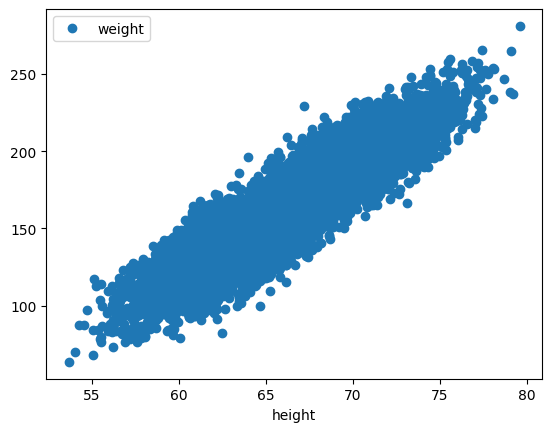

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight', style='o')
plt.show()

Each data point is now plotted independently, making it clear that there is a relationship between weight and height. The scatter plot also allows us to easily identify outliers. However, there is an even better way to create scatter plots using Pandas.

We can create a scatter plot directly using the kind= parameter in plot().

This parameter tells plot() what type of plot to create. In this case, we use the 'scatter' argument to create a scatter plot.

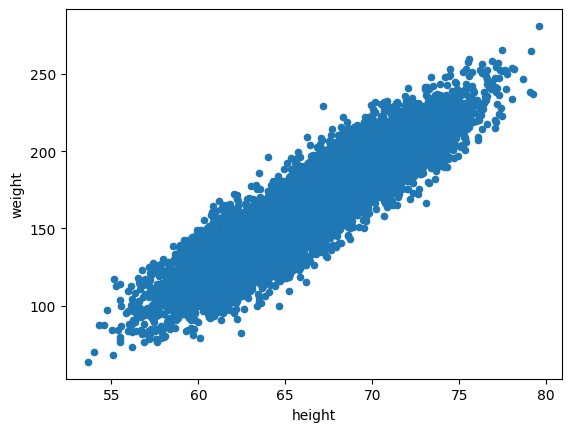

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(x='height', y='weight', kind='scatter')
plt.show()

The data points are almost identical in both charts. The points in the second chart are slightly smaller than those in the first, but do you notice any other differences between these two ways of creating a scatter plot?

If we don't specify kind='scatter', then the Y-axis is unlabeled by default, and we also have an unnecessary legend. By explicitly creating a scatter plot, it's already nicely formatted with labeled axes.

There's just one last thing to talk about regarding scatter plots. With so many points, many of them overlap, making it difficult to get a good idea of ​​the point density in the previous chart.

However, we can work around this problem by using the alpha= parameter. This parameter governs the transparency of the points and can accept any value between __0 (completely transparent) and 1 (not at all transparent)__. By default, it's set to 1, indicating no transparency.

As the value decreases, each point becomes dimmer, and it's easier to see where the greatest density of points is. The trade-off is that it becomes harder to see the points at the extremes of the distribution. The best alpha value to use is really a matter of taste and what you want to emphasize with your chart.

_alpha=_ sets the transparency of the points in the chart to the specified value.

##### _Excercise 01_

To make the analysis more interesting and easier to understand, we'll use the same data set as before, but this time we'll analyze height versus age instead of weight. You'll create a scatter plot that shows the relationship between these two variables.

Use the kind='scatter' argument to create the desired scatter plot. Give the plot the following arguments:

- The title "Adult heights" (case is important).
- Alpha value of 0.36.
- Plot size of 8 by 6 inches.
- X-axis labeled "Age / years".
- Y-axis labeled "Height / inches".

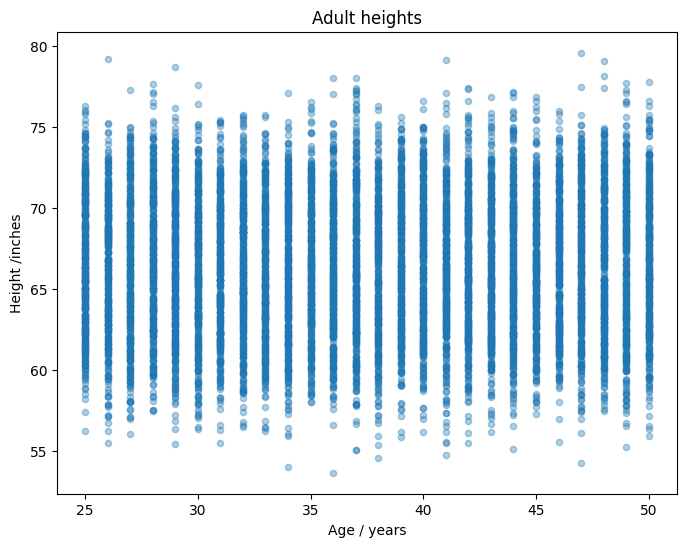

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(title='Adult heights', x='age', y='height', kind='scatter', alpha=0.36, figsize=[8, 6], xlabel="Age / years", ylabel="Height /inches")

plt.show()

Often, the main objective of data analysis is to show the relationship between two variables. For example, we may want to determine how the price of an apartment relates to its size. Does distance from the city center affect its value? What impact does the year of construction or the noise level of the neighborhood have? Scatter plots help us answer these questions by providing a visual representation of these relationships.

The tendency of one variable to change in relation to a change in another variable is called correlation.

The scatter plots we made in the last lesson show that height and weight are positively correlated. This makes sense because an increase in one generally means an increase in the other. An example of a negative correlation would be height and voice pitch; generally, the taller a person is, the lower the pitch of their voice.

##### _Correlation Coefficient_

It's one thing to look at the graph, but we also need a numerical form to describe the correlation.

To quantify how one variable tends to change when the other variable changes, we use __Pearson's correlation coefficient__, commonly known as the __correlation coefficient__. _This coefficient can take any value between -1 and 1._

A value of -1 represents a perfect negative linear correlation, while a value of 1 represents a perfect positive linear correlation. In general, the correlation coefficient works like this:

- If one of the values ​​increases along with the other, the correlation coefficient is positive.
- If one stays the same while the other changes, the coefficient is 0.
- If one decreases while the other increases, the coefficient is negative.

The closer the coefficient is to -1 or 1, the stronger the correlation. On the other hand, a value of 0 can mean no correlation or a complex nonlinear connection that the coefficient cannot reflect.

![Graphs](Pics/PearsonCorrelation.jpg)

##### _Calculating the Correlation Coefficient_

In Pandas, you can calculate _Pearson's correlation coefficient using the corr() method._ To do this, apply it to the column with the first variable and pass the column with the second variable as a parameter. The order of the variables doesn't matter. For example:

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

print(df['height'].corr(df['weight']))

0.9165261045538688


With a coefficient of around 0.9, height and weight have a strong positive correlation in this data set. This is consistent with our "common sense" that taller people tend to weigh more. Of course, there is variation in this tendency, so we wouldn't expect a perfect positive correlation coefficient of 1.

It may be tempting to make a statement like "a person's height determines their weight." However, on its own, correlation can't tell us anything about cause and effect; we only know that the two factors are correlated. To prove (or disprove) cause and effect, we would need to conduct controlled experiments. Remember, correlation does not imply causation.

##### _Exercise 02_

Remember the scatter plot you made in the last lesson for the 'height' and 'age' columns? Now you're going to calculate the Pearson correlation coefficient for those columns and assign the result to a variable called ah_corr. Then display it. Does the result align with the scatter plot?

In [17]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

ah_corr = df['height'].corr(df['age'])

print(ah_corr)

0.010042046516844347


Try calling the corr() method on the entire DataFrame. To do this, follow the same process as before, but don't pass any variables to the DataFrame df or the corr() method. What happens? Print the result.

In [18]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

ah_corr = df.corr()
print(ah_corr)

          height    weight       age      male
height  1.000000  0.916526  0.010042  0.760690
weight  0.916526  1.000000  0.228538  0.785218
age     0.010042  0.228538  1.000000  0.004750
male    0.760690  0.785218  0.004750  1.000000


It looks like pandas returned a DataFrame with the correlation coefficients for each pair of variables. Great! We'll learn more about that in the next lesson.

##### _Scatter Matrices_

Creating Scatter Matrices

In the previous lesson, we found a strong correlation between height and weight, but in real life, things are rarely that simple. If we are interested in exploring the factors that contribute to people's weight, there is much more to consider than height. For example, we might also want to know how age and sex correlate with weight, or how they correlate with each other.

Unfortunately, it is impossible to plot all four parameters on the same graph consistently. However, we can create scatter plots for every possible pair of parameters: height and weight, height and age, weight and sex, and so on. _This set of pairwise plots is called a scatter matrix._

In Pandas, we can build scatter matrices using the _plotting.scatter_matrix()_ function

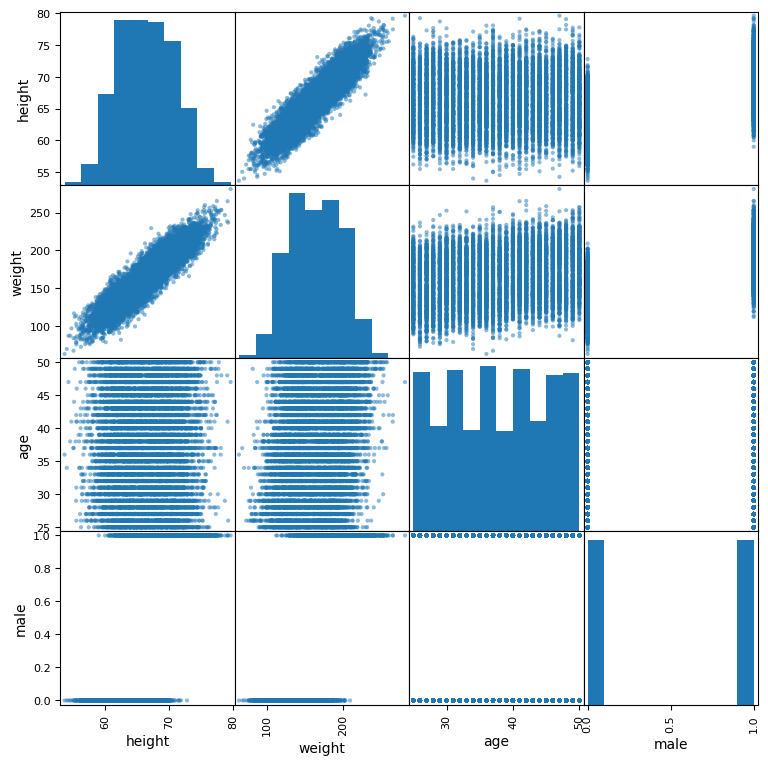

In [19]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

pd.plotting.scatter_matrix(df, figsize=(9, 9))
plt.show()

Each cell in this 4x4 grid shows the relationship between a pair of columns. Let's break it down. We'll show each graph below the explanation, and you can find it again in the matrix for your own reference.

The diagonal cells don't show the relationships between variables. Instead, there are histograms that show the distribution of values ​​for each individual variable. For example, examine the first image above. There we can see that adults are typically between 64 and 68 inches tall. We'll study histograms in more detail in the final chapter.

<img src="Pics/DiagCorScatter.jpg" width="400" height="300" />

Las celdas que están justo debajo y al lado del histograma de altura muestran la conexión entre altura y peso. Ambos gráficos de dispersión de altura-peso contienen información idéntica, pero los ejes simplemente están invertidos. Vimos este gráfico de dispersión en la última lección, y determinamos que es indicativo de una fuerte correlación positiva (un coeficiente de correlación de aproximadamente 0.9).

![Graphs](Pics/hwScatter.jpg)

Scatter plots for the age-height relationship show a wide scattering of points with no clearly discernible relationship, as you could see when you created this scatter plot and calculated the coefficient of relationship (about 0.01) in the previous lessons.

![Graphs](Pics/haScatter.jpg)

The age-weight scatterplots also have a wide spread of weights for each age, but there appears to be a slight positive trend for the age-height scatterplots.

![Graphs](Pics/awScatter.jpg)

The last row (and last column) of the scatter plots show the relationship between gender and the other variables, where a value of 1 means the person is male and 0 means female. These plots show a positive correlation in the gender-height and gender-weight relationships, but not in the gender-age relationships.

![Graphs](Pics/gender.jpg)

With a single line of code, we created a scatter plot matrix that allowed us to make many inferences about the relationships between the variables in our data set. Don't you think it would be great if we could quantify all these relationships as well?


##### _Correlation matrices_

The returned table is called a correlation matrix. This matrix contains the correlation coefficients for each pair of numeric columns in the DataFrame.

In [20]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

print(df.corr())

          height    weight       age      male
height  1.000000  0.916526  0.010042  0.760690
weight  0.916526  1.000000  0.228538  0.785218
age     0.010042  0.228538  1.000000  0.004750
male    0.760690  0.785218  0.004750  1.000000


The coefficients on the diagonal from top left to bottom right always equal 1, since any variable is perfectly correlated with itself. The diagonal elements above (and below) the main diagonal contain the coefficients for each pair of columns. In this case, there are six unique correlation coefficients for the possible pairs of the variables being compared.

<img src="Pics/corr_matrix.png" alt="Graphs" width="900" height="300">

Building a correlation matrix is ​​a much faster way to obtain all the correlation coefficients than calling corr() individually for each pair of columns. In this case, there are only 6 pairs, but imagine if we had dozens of numerical columns!

##### _Excercise 03_

Obtain the correlation coefficients for the 'male' column with each of the other three columns. But instead of calling corr() on the 'male' column three separate times, create a correlation matrix and extract the three coefficients you want. The result should be a Series object with three elements, one for each coefficient.

Assign the correlation matrix to a variable called corr_mat and assign the Series of coefficients to a variable called male_corr. Then, display male_corr.

Use loc[] with 'male' as the first argument and a list of the other data as the second argument to extract those values ​​for the variable male_corr.

In [25]:
import pandas as pd

df = pd.read_csv('DataSets/height_weight.csv')

corr_mat = df.corr()
male_corr = corr_mat.loc['male', 'height':'age']
print("Male correlation values:\n", male_corr)

Male correlation values:
 height    0.760690
weight    0.785218
age       0.004750
Name: male, dtype: float64


#### _Line Charts_

Remember when we used the plot() method without specifying an argument for the kind= parameter? That gave us a line chart where each data point is sequentially connected by a line.

It looked something like this:

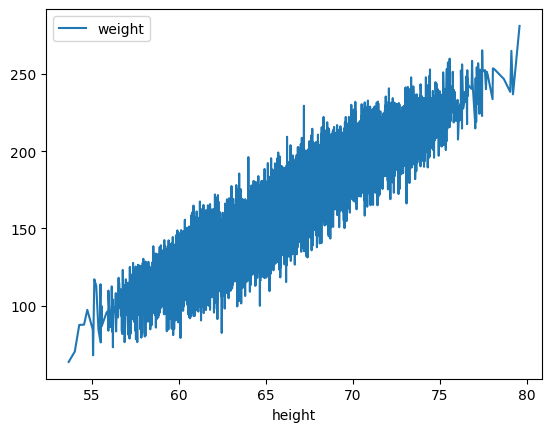

In [26]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.sort_values('height').plot(x='height', y='weight')
plt.show()

However, a line chart is not appropriate for this data because these charts imply a relationship between consecutive data points.

Instead, _line charts are excellent when you have data that is connected chronologically and each time point in the data has_ __some dependency on the previous point.__ Things like temperature data, traffic data, and stock market data are good candidates for line charts.

In this lesson, we're going to work with stock market data for Starbucks (SBUX) from 2015 to 2019. We obtained this dataset from Yahoo Finance and modified it to contain only a subset of the available columns.

Let's take a look at the data:

In [27]:
import pandas as pd

df = pd.read_csv('DataSets/sbux.csv')

print(df.head())
print()
df.info()

         date       open      close    volume
0  2015-01-02  41.064999  40.720001   6886000
1  2015-01-05  40.070000  39.939999  11623800
2  2015-01-06  40.169998  39.615002   7664400
3  2015-01-07  39.875000  40.590000   9732600
4  2015-01-08  41.165001  41.244999  13170600

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   open    1258 non-null   float64
 2   close   1258 non-null   float64
 3   volume  1258 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 39.4+ KB


There are four columns in the dataset:

- 'date': Date the data was recorded.
- 'open': Price of a stock in USD at market open, i.e., the first price of the day.
- 'close': Price of a stock in USD at market close, i.e., the last price of the day.
- 'volume': Total number of shares traded.

For example, the first row tells us that on January 2, 2015, Starbucks' stock opened at $41.06, closed at $40.72, and 6,866,000 shares were traded that day. Each row represents a trading day when the market was open, excluding weekends and certain holidays.

From the output of info(), we also see that 'date' has a string data type; the other columns are numeric and have no missing values. For our purposes, it's fine to represent dates as strings, but later in the sprint, you'll learn about special data types for dates and times that will make it easier to extract information and perform calculations with them.

For time-based data like this, it's reasonable to assume that one day's price has some relationship to the previous day's price. So let's go ahead and make a line chart to visualize the opening price of Starbucks stock over the life of the dataset:

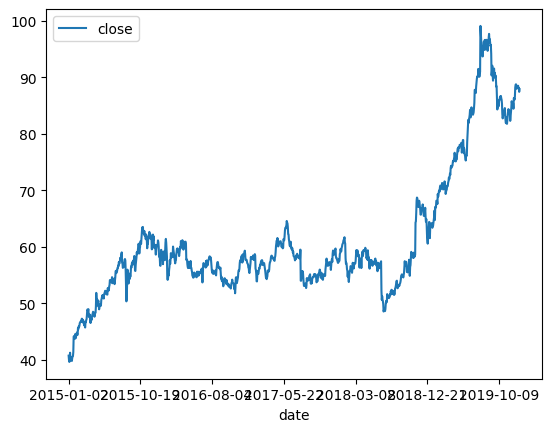

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/sbux.csv')

df.plot(x='date', y='close')
plt.show()

All we needed to do to plot a line chart was call plot() on our DataFrame without a kind= argument and specify which columns we wanted to plot on the X and Y axes, just as we've already done with our other charts. You don't have to specify the kind= argument as "line," since it's already a default.

Now we have a great representation of Starbucks' historical stock opening price. It looks like the price spikes quite quickly later in the chart. Around what date did that happen? It's hard to tell from this chart because the tick labels on the X axis overlap each other.

Also, to correct the tick label overlap, what other improvements could we make to this chart?

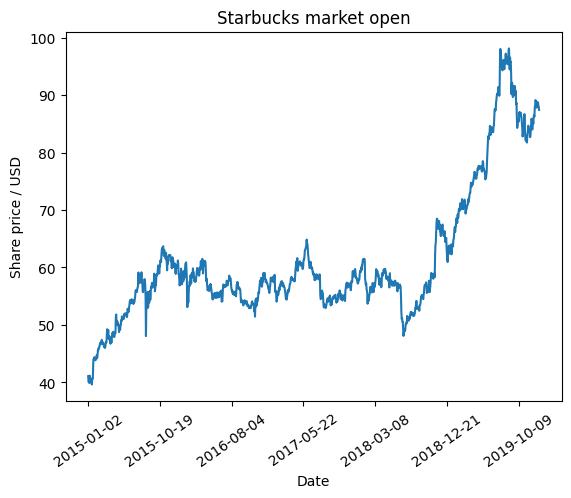

In [35]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/sbux.csv')

df.plot(x='date',
        y='open',
        legend=False,
        title='Starbucks market open',
        xlabel='Date',
        ylabel='Share price / USD',
        rot=35)

plt.show()

By now, all of the parameters we used for this chart should be familiar to you, except for the last one: _rot=_. This argument rotates the tick labels on the _X-axis_ by the specified number of degrees. We use this to ensure that our tick labels don't overlap each other, and are now presented at 45º angles to the X-axis.

##### _Excercise 04_

Create a line chart for the trading volume of the Starbucks stock dataset. Make your chart adhere to the following:

- Title "Historic SBUX Volume" (case sensitivity is important).
- X-axis with legend "Date".
- Y-axis with legend "Volume".
- X-axis tick legends rotated 50 degrees.
- Y-axis limit from 1 million to 70 million (you can use 1e6 and 7e7 as the upper and lower limits, respectively, to avoid zeros. 1,000,000 = 1e6, i.e., 1 to the 6th power).
- No legend.

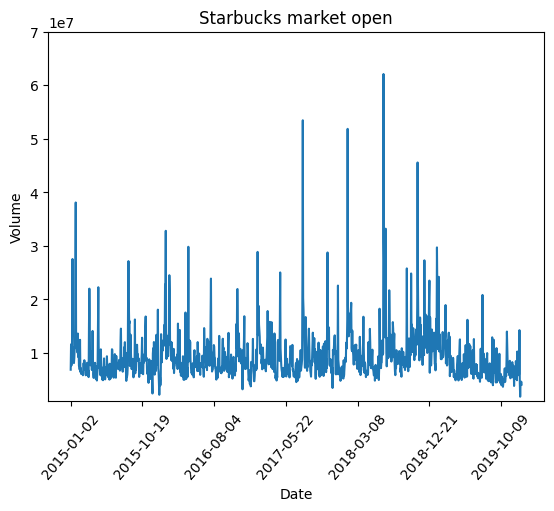

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/sbux.csv')

df.plot(x='date',
        y='volume',
        legend=False,
        title='Historic SBUX volume',
        xlabel='Date',
        ylabel='Volume',
        ylim=[1e6, 7e7],
        rot=50)

plt.show()

##### _Excercise 05_

Create a line chart that includes both the open and close prices. To do this, you can pass the list of column names, cols, provided in the precode as your argument to y=. Since you'll have two different variables in the same chart, be sure to include a legend this time. Make your chart also comply with the following:

- Title "Historic SBUX price" (case sensitivity is important).
- X-axis with the legend "Date".
- Y-axis with the legend "Share price / USD". Leave a space before and after the / for clarity and to avoid errors.
- X-axis tick legends rotated 50 degrees.
- Don't forget to include plt.show().

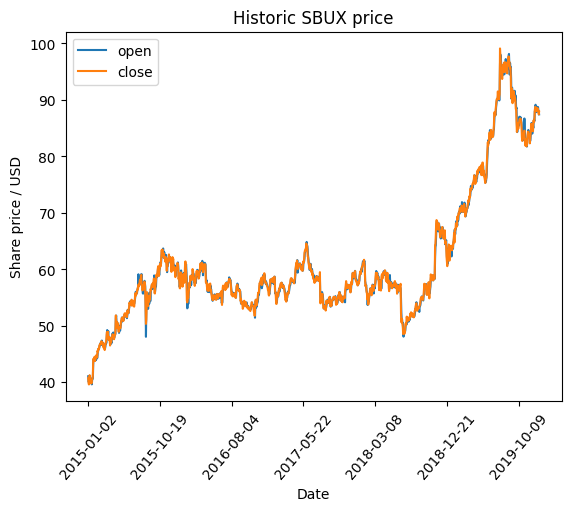

In [37]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/sbux.csv')
cols = ['open', 'close']

df.plot(x='date',
        y=cols,
        title='Historic SBUX price',
        xlabel='Date',
        ylabel='Share price / USD',
        rot=50)

plt.show()

#### _Bar Charts_

So far, we've been learning how to visualize relationships between numerical variables in our data, but what about categorical variables? Most of the data sets you'll work with have a combination of numerical and categorical data.

Bar charts are a great tool for comparing categories defined by a numerical value.

So, in this lesson, we'll use bar charts to visualize data taken from the U.S. Census Bureau on historical population levels in California, Oregon, and Washington. Bar charts are a great choice here because they allow us to compare numerical properties (population) between categories (states).

Let's start by showing some general information about the data set

In [46]:
import pandas as pd

df = pd.read_csv('DataSets/west_coast_pop.csv')
df.info()
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    10 non-null     int64  
 1   ca_pop  10 non-null     float64
 2   or_pop  10 non-null     float64
 3   wa_pop  10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 452.0 bytes



,year,ca_pop,or_pop,wa_pop
0,1920,3.554,0.788,1.373
1,1930,5.711,0.956,1.568
2,1940,6.950,1.086,1.740
3,1950,10.680,1.532,2.387
4,1960,15.870,1.772,2.855
5,1970,19.970,2.092,3.413
6,1980,24.290,2.668,4.236
7,1990,29.950,2.859,4.901
8,2000,33.630,3.342,5.811
9,2010,37.270,3.856,6.746


We have population data for California, Oregon, and Washington, taken every 10 years from 1920 to 2010, in units of millions of people.

Let's compare the population of each state by year. To visualize this data in a bar chart, we call the plot() method on the DataFrame and specify kind='bar' as an argument. But we need to specify that we want the 'year' column on the x-axis, otherwise the chart won't make much sense:

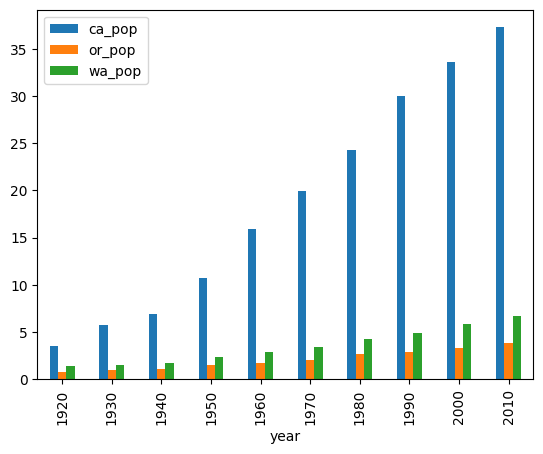

In [48]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/west_coast_pop.csv')

df.plot(x='year', kind='bar')
plt.show()

As expected: a set of three bars, one for each state, for each year in the dataset.

If you don't specify any columns for the y= parameter, pandas will automatically create a bar for each column in the DataFrame that isn't on the x-axis; in this case, one bar for each state's population.

The bar chart makes it easy to draw certain conclusions about the data. For example, we can see that California's population is consistently much larger than that of other states. We also see that the population has grown steadily in all states.

However, if we want to present this data to others, we need it to look more professional:

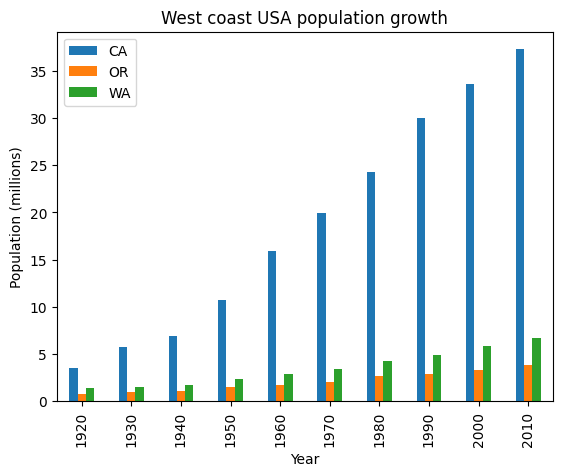

In [49]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/west_coast_pop.csv')

df.plot(x='year',
        kind='bar',
        title='West coast USA population growth',
        xlabel='Year',
        ylabel='Population (millions)')

plt.legend(['CA', 'OR', 'WA'])
plt.show()

To enhance our chart, we used a new Matplotlib function called legend(). This function allows us to manually specify legend labels by passing a list of label names instead of the default behavior of using the DataFrame's column names.

The audience we are presenting this chart to is likely unfamiliar with the technical aspects of our dataset, so names like 'ca_pop' might not make sense to them. It's much better to use familiar labels like CA, OR, and WA.

Note that the order of the legend labels in the list will correspond to the order of the columns in the DataFrame, so it's important to order the labels correctly. Additionally, plt.legend() must come after we call plot() on our DataFrame.

##### _Excercise 06_

California's population is much larger than that of Oregon and Washington, so it's difficult to get a sense of the data for those two states from the graph we created. Create a bar chart showing only the populations of Oregon and Washington for each year in the data set. Do this by calling plot() on df with arguments that give your graph the following properties:

- Include only data for Oregon and Washington by specifying our y-axis, just as we did in the previous lesson.
- Title: “Pacific Northwest population growth.” Case sensitivity is important.
- The x-axis is labeled: “Year.”
- The y-axis is labeled: “Population (millions).”
- Legend is labeled “OR” and “WA” for the populations of Oregon and Washington, respectively

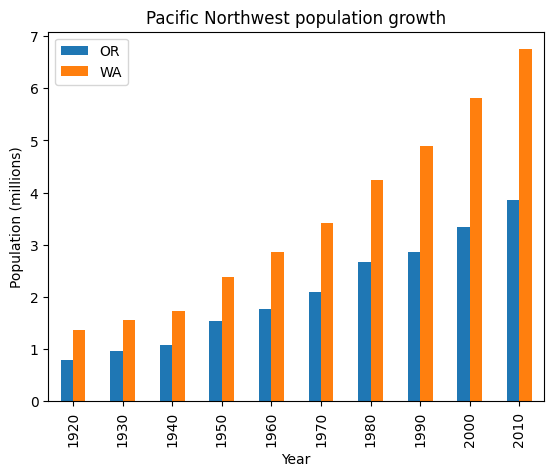

In [50]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/west_coast_pop.csv')

df.plot(x='year',
        y=['or_pop', 'wa_pop'],
        kind='bar',
        title='Pacific Northwest population growth',
        xlabel='Year',
        ylabel='Population (millions)')

plt.legend(['OR', 'WA'])
plt.show()

#### _Histograms_

A histogram is a graph that shows the frequency with which different values ​​for a variable appear in your data set. Although it may resemble bar charts, there are some key differences between the two types:

Bar charts are used to compare values ​​of discrete variables; histograms are used to plot distributions of continuous numerical variables.
The order of the bars in bar charts can be modified for stylistic or communication purposes. However, the order of the bars in histograms cannot be changed.
In a histogram, the x-axis represents the variable and its range of values. The y-axis represents the frequency of occurrence for each value. Therefore, it doesn't make sense to change the order of the bars.

<img src="Pics/Histogram.png" width="400" height="300" />

This histogram represents a variable that takes values ​​in the range of 1 to 9, with values ​​around 4 and 7 being the most frequent.

Because the variable can take any value in the range, counting each unique value and graphing the frequencies is not useful. Instead, a _histogram divides the range of values ​​into sections called_ __containers__. In the graph above, one of the containers is highlighted to illustrate the container sizes.

Each container has the same width; the height of a container corresponds to the number of observations that fall within that container's range. Therefore, the appearance of a histogram depends on the number of containers we decide it should have.

The histogram above has 25 containers. Let's see what happens if we plot the same data using only 10 containers.

<img src="Pics/Histogram10Bins.png" width="400" height="300" />

And 100 containers:

<img src="Pics/Histogram100Bins.png" width="400" height="300" />


The chart with 10 containers doesn't have enough detail, and the one with 100 containers has too many. Choosing the right number of containers can be more art than science, but with practice, you'll get the hang of it.

In [ ]:
Plotting Histograms of DataFrames
In Pandas, there are two ways to plot histograms:

- The hist() method.
- The plot() method with the kind='hist' argument.

Let's examine hist() first:

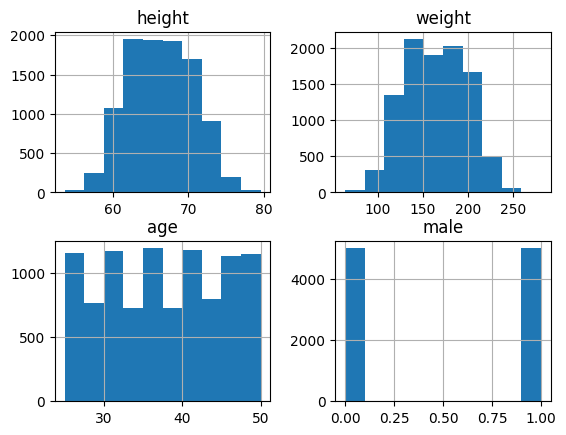

In [51]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')
df.hist()

plt.show()

If you call hist() on a DataFrame without any arguments, it creates a separate plot for each numeric column. Do these histograms look familiar? They were the diagonal plots of our scatter plots!

Now let's try calling plot() on our DataFrame to create histograms:

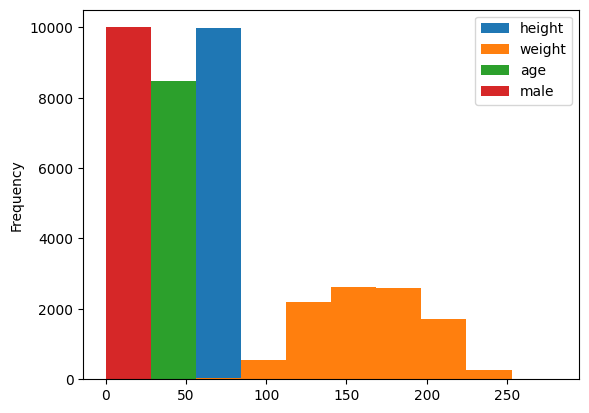

In [52]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.plot(kind='hist')

plt.show()

The default behavior of plot() differs considerably from that of hist().

Using plot(), we can plot each histogram on the same graph. However, this doesn't make sense for this data, as each of the four columns represents a different physical quantity. Therefore, it's not appropriate to plot them all along the same axis.

##### _Plotting Column Histograms_

Often, you'll want to explore one variable at a time. We can plot a histogram for a single column using hist() by passing the column name as an argument to the column= parameter. Let's take a closer look at the 'height' column:

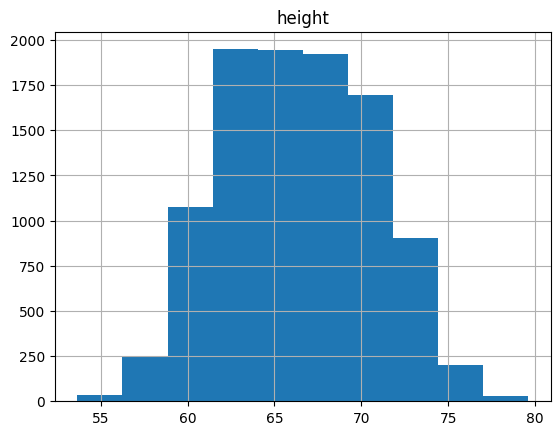

In [53]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.hist(column='height')

plt.show()

Alternatively, we could plot the same histogram by calling hist() on only the 'height' column:

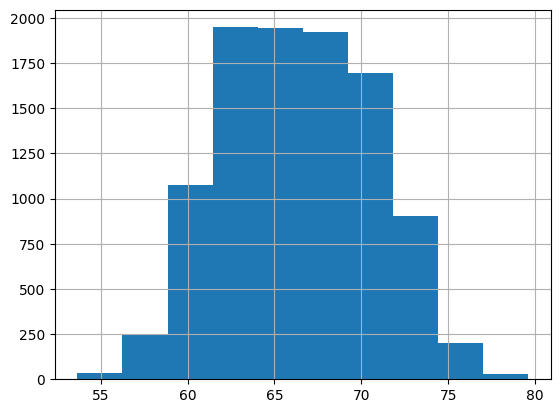

In [54]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df['height'].hist()

plt.show()

By default, hist() uses 10 containers. However, for this data, 10 containers seems too small to capture the level of detail we desire. To resolve this, we can use the containers= parameter to adjust the number of containers used:

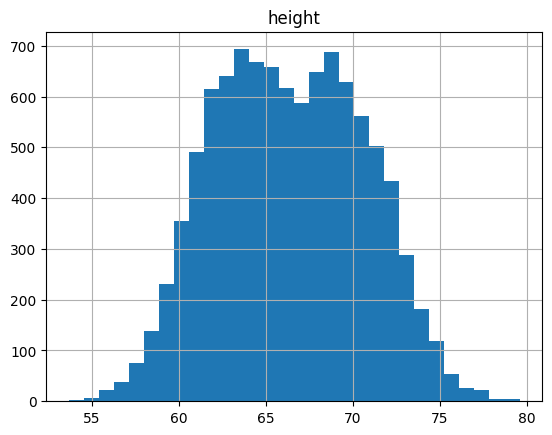

In [55]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df.hist(column='height', bins=30)

plt.show()

We can make the same histogram using plot() by calling it only on the 'height' column:

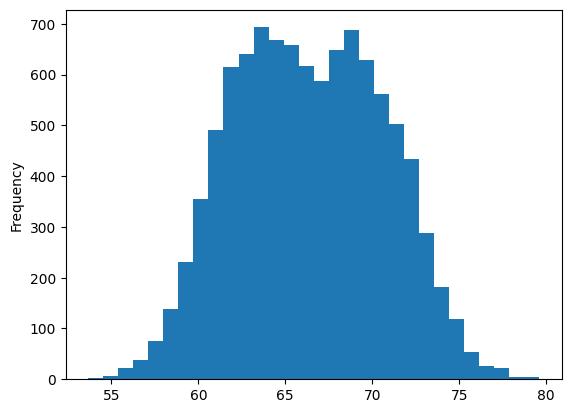

In [56]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df['height'].plot(kind='hist', bins=30)

plt.show()

The histogram is the same, but the default formatting of the plots differs between methods. If you want to see a histogram for a single variable, we recommend using plot() because hist() doesn't support all the formatting keywords you've learned, such as title=, xlabel=, and ylabel=.

##### _Comparing Histograms for Subsets of Data_

The height in the histogram plotted above shows two more frequent peaks of values. This could be due to differences in the height distribution of men and women. To investigate this issue, we can plot the height histograms for men and women separately on the same graph.

All we need to do is filter the DataFrame by gender and then call plot() on the 'height' column. If we do this twice (once for each gender), Pandas will automatically plot both on the same graph, with the second histogram ahead of the first:

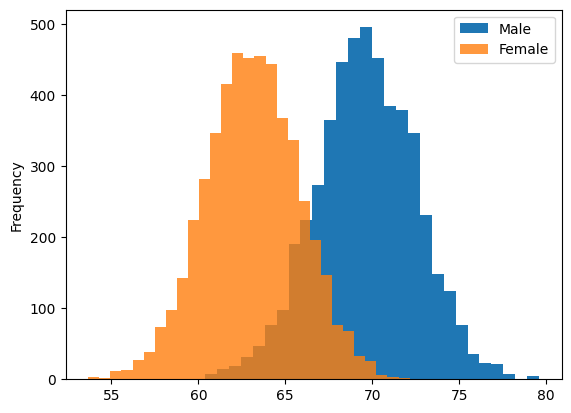

In [57]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

# this will show the male plot
df[df['male'] == 1]['height'].plot(kind='hist', bins=30)

# this will show the female plot
# and include an alpha value so we can see both histograms completely
df[df['male'] == 0]['height'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['Male', 'Female']) # legend, which follows the same order plotted above
plt.show()

Placing both histograms on the same chart makes it much easier to see that the height distribution for men is shifted to the right compared to that of women. For example, an average man is probably taller than an average woman. This is why the combined histogram for the entire data set has two peaks.

Note that, in this case, it makes sense to plot both histograms on the same chart, as they both represent the same variable: height. However, in other cases, it might not make sense, and you should be aware of this.

If you need to, you can use the index to split your histogram using the same logic as for the filter you used with the 'male' variable. To do this, sort the variable and reset the indexes so that the female is the first in the DataFrame. Then, cut the DataFrame in half so you can see the bottom half of the data.

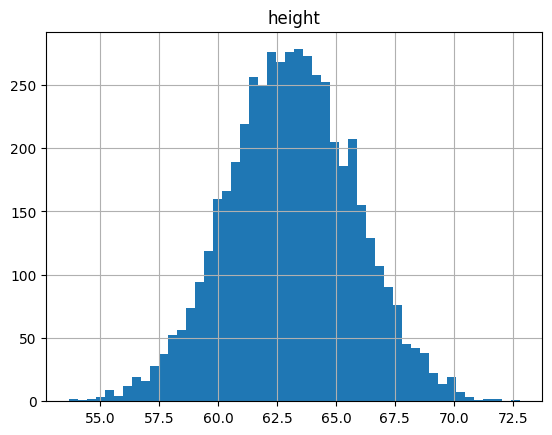

In [58]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df = df.sort_values('male').reset_index(drop=True)

df = df[df.index < 5000]

df.hist(column='height', bins=50)

plt.show()

Histograms give us an idea of ​​how our data is distributed. By visualizing the distribution, we can gain insight into key information such as the most frequent values ​​and the presence of outliers.

- We can use the hist() or plot() methods to create histograms for our four numeric columns.
- Calling hist() on a DataFrame creates a separate histogram for each numeric column.
- Calling plot() with kind='hist' plots a histogram for each numeric column, all on the same graph.
- Calling either method multiple times will also plot each new histogram on the same graph. This is useful for comparing distributions between different data subsets, such as the height of men and women.

##### _Excercise 07_

Investigate the weight distribution for different age groups. We'll do this in two steps. To begin, split the dataset into three DataFrames by filtering df and assigning them to the following variables:

- df_20s: Only rows where 'age' is less than 30.
- df_30s: Only rows where 'age' is greater than or equal to 30 and less than 40.
- df_40s: Only rows where 'age' is greater than or equal to 40 (includes 50 years).

To verify that you filtered correctly, display the following results:

- The sum of the lengths of the three DataFrames (there should be 10,000 rows in total).
- The minimum and maximum values ​​in the 'age' column of df_20s
- The minimum and maximum values ​​in the 'age' column of df_30s
- The minimum and maximum values ​​in the 'age' column of df_40s

The precode already contains a template for you to display your results; just complete the code.

In [60]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df_20s = df[df['age'] < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df['age'] >= 40]

print("La suma de las longitudes del dataframe:", len(df_20s) + len(df_30s) + len(df_40s))
print("Edad mínima y máxima para df_20s:", df_20s['age'].min(), df_20s['age'].max())
print("Edad mínima y máxima para df_30s:", df_30s['age'].min(), df_30s['age'].max())
print("Edad mínima y máxima para df_40s:", df_40s['age'].min(), df_40s['age'].max())

La suma de las longitudes del dataframe: 10000
Edad mínima y máxima para df_20s: 25 29
Edad mínima y máxima para df_30s: 30 39
Edad mínima y máxima para df_40s: 40 50


And, for the second step, you'll create a histogram for each age group, all on the same graph. To do this, do the following:

- Call plot() on the 'weight' column of df_20s
* Set the number of bins to 20.
* Title the graph "Weight / lbs".
* Label the Y-axis "Frequency".

- Call plot() on the 'weight' column of df_30s
* Set the number of bins to 20.
* Set the alpha value to 0.6.

- Call plot() on the 'weight' column of df_40s
* Set the number of bins to 20.
*Set the alpha value to 0.3.

Finally, use matplotlib's legend() function to label each histogram as "20s", "30s", and "40s", respectively.

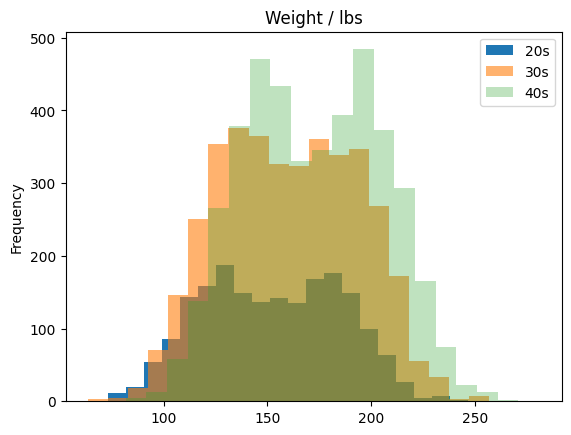

In [61]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('DataSets/height_weight.csv')

df_20s = df[df['age'] < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df['age'] >= 40]

df_20s['weight'].plot(kind='hist',
                      bins=20,
                      title='Weight / lbs',
                      ylabel='Frequency')

df_30s['weight'].plot(kind='hist', bins=20, alpha=0.6)
df_40s['weight'].plot(kind='hist', bins=20, alpha=0.3)


plt.legend(['20s', '30s', '40s'])
plt.show()

#### _Box Plot_

            score
count   10.000000
mean    91.500000
std     24.272756
min     65.000000
25%     76.250000
50%     87.500000
75%     98.750000
max    150.000000



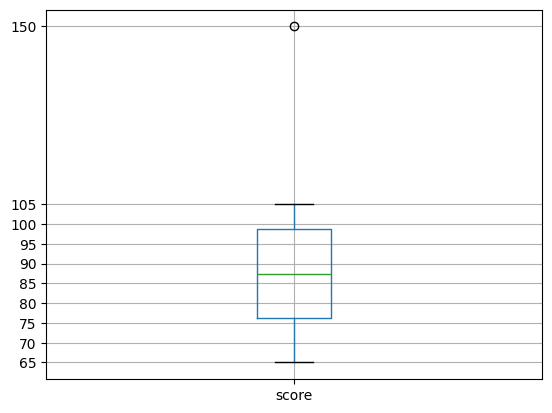

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'score': [65, 70, 75, 80, 85, 90, 95, 100, 105, 150]})
plt.yticks([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 150])
print(df.describe())
print()
df.boxplot(column='score', grid=True)
plt.show()

What each part means:

- Box (Q1 to Q3): Middle 50% of the data (called Interquartile Range or IQR).
- Line in the box (Q2): The median (middle value).
- Whiskers: Stretch from the box to the lowest and highest values within 1.5 × IQR.
- Dots outside whiskers: Outliers — values far from the rest.

Real-life example
Imagine analyzing monthly sales:

sales = [10, 12, 15, 20, 22, 24, 28, 30, 50, 95]

- Q1 = 15
- Q2 (median) = 22
- Q3 = 30
- IQR = Q3 - Q1 = 15

- Whiskers:
* Lower: Q1 - 1.5×IQR = 15 - 22.5 = outlier if < -7.5
* Upper: Q3 + 1.5×IQR = 30 + 22.5 = 52.5 → 95 is an outlier

So the box shows the stable sales range, and the 95 shows an exceptional spike.